# Frequency of Selected Keys

In [1]:
import pandas as pd
import numpy as np
import requests
import xmltodict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
#load financial data

path = r'/Users/annabramslow/Documents/Company2Vec/Data/financials.csv'

df = pd.read_csv(path, index_col=0)

In [9]:
#selected keys
selected_keys = ['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries', 'ProfitLoss', 'OtherFinanceIncome','OtherFinanceExpenses',
                 'NonCurrentAssets','CurrentAssets','CashAndCashEquivalents','Assets', 'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
                 'LongtermLiabilitiesOtherThanProvisions','ShorttermDebtToBanks','LiabilitiesOtherThanProvisions','LiabilitiesAndEquity']

In [8]:
#find columns name from 6th column onwards
columns = df.columns[5:]
columns

Index(['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries',
       'ProfitLoss', 'OtherFinanceIncome', 'OtherFinanceExpenses',
       'NonCurrentAssets', 'CurrentAssets', 'CashAndCashEquivalents', 'Assets',
       'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
       'LongtermLiabilitiesOtherThanProvisions', 'ShorttermDebtToBanks',
       'LiabilitiesOtherThanProvisions', 'LiabilitiesAndEquity'],
      dtype='object')

In [10]:
#check that selected keys are equal to the columns
columns == selected_keys

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Frequency Plot of Key Occurences

In [13]:
#create new audit class column with only letter
df['audit_class'] = df['AuditClass'].str.extract(r'(Regnskabsklasse|Reporting class) (\w)')[1]

#for each audit class, compute share of values that are not missing per column
shares = df.groupby('audit_class')[columns].apply(lambda x: x.notnull().mean())
shares

,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,OtherFinanceExpenses,NonCurrentAssets,CurrentAssets,CashAndCashEquivalents,Assets,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity
audit_class,,,,,,,,,,,,,,,,
A,0.333333,0.666667,0.666667,1.000000,0.666667,0.666667,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.333333,1.000000,1.000000
B,0.685115,0.432980,0.191441,0.999691,0.600555,0.679457,0.0,0.891781,0.861228,0.993211,0.997223,0.927682,0.297912,0.191133,0.939821,0.993005
C,0.588000,0.856000,0.640000,1.000000,0.944000,0.772000,0.0,0.936000,0.968000,1.000000,1.000000,0.988000,0.712000,0.428000,0.972000,1.000000
D,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.500000,1.000000


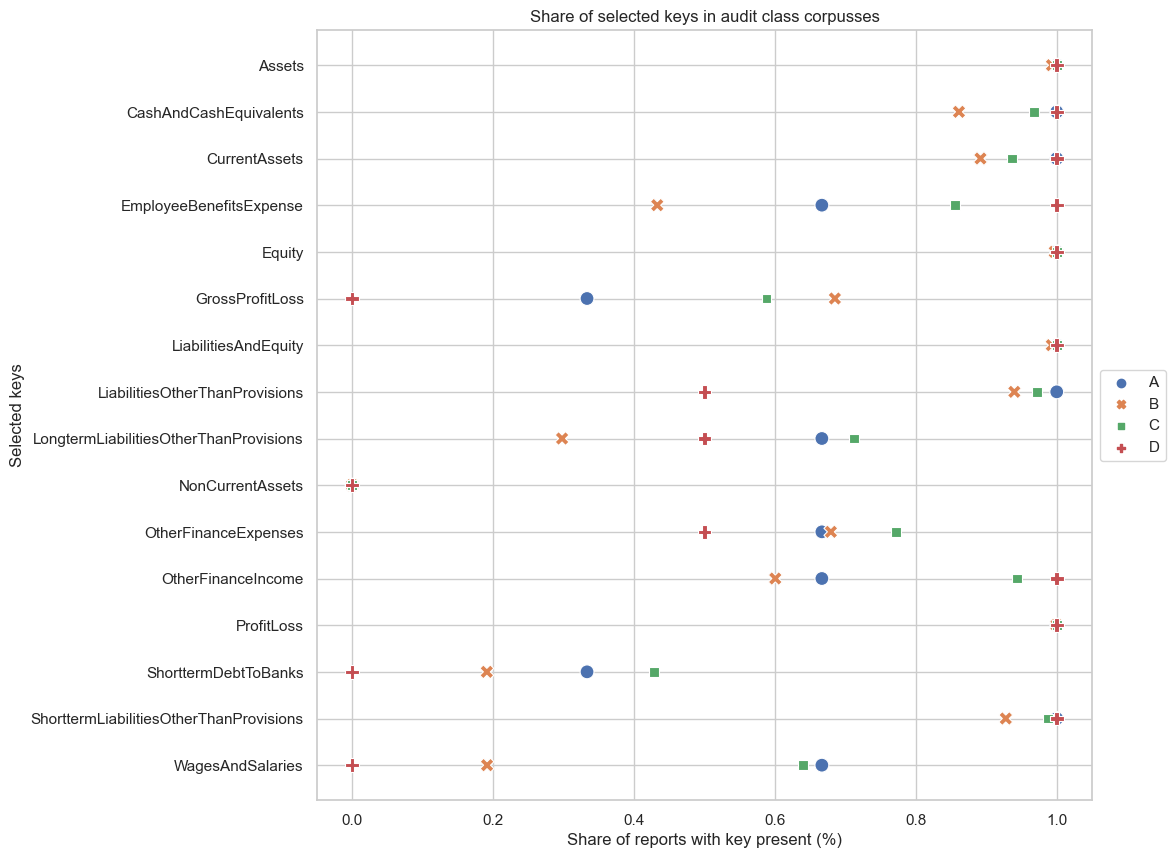

In [14]:
#create a list of shares for each audit class
share_A = shares.loc['A'].values
share_B = shares.loc['B'].values
share_C = shares.loc['C'].values
share_D = shares.loc['D'].values

#plot the share value of the selected keys in each of the audit class corpusses as a combined scatter plot
#the y-axis is the selected keys, the x-axis is the share count of the selected key in the audit class corpus
#the hue is the audit class
#make the shapes of the points different for each audit class
#place legend outside of the plot

df_plot = pd.DataFrame({'key': selected_keys*4, 'share': np.concatenate([share_A, share_B, share_C, share_D]), 
                        'audit_class': ['A']*len(selected_keys) + ['B']*len(selected_keys) + ['C']*len(selected_keys) + ['D']*len(selected_keys)})
df_plot['audit_class'] = df_plot['audit_class'].astype('category')
df_plot['key'] = df_plot['key'].astype('category')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_plot, x='share', y='key', hue='audit_class', style='audit_class', s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Share of reports with key present (%)')
plt.ylabel('Selected keys')
plt.title('Share of selected keys in audit class corpusses')
plt.show()